In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('data/train_normalized.csv').drop(columns=['id'])
print(data.head())

        amt  city_pop  trans_hour  day_of_week  trans_month  location_diff  \
0  0.265021 -0.360419    0.260870     0.333333     0.083333       1.151013   
1 -0.085246 -0.462684    0.086957     0.833333     0.083333      -0.568319   
2 -0.497846 -0.495328    0.913043     0.500000     0.083333       0.713090   
3 -0.481426 -0.419992    0.695652     1.000000     0.083333       0.189719   
4 -0.107876 -0.340621    0.826087     1.000000     0.083333       0.438265   

        age  category  merchant  job  gender  is_fraud  
0 -0.306232         9       638    6       0         0  
1  0.139646         4       550  160       0         0  
2 -1.325384         0       450   80       1         0  
3  3.069707         5       105  377       1         0  
4  1.732070         5       350  451       0         0  


In [3]:
# Get the first 5k for training
# data = data[:5000]
# Split the data into features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9307400763410258


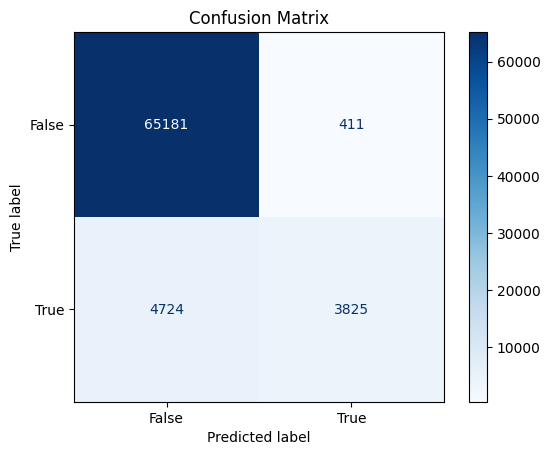

In [4]:
# Linear SVM model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9303219541144576


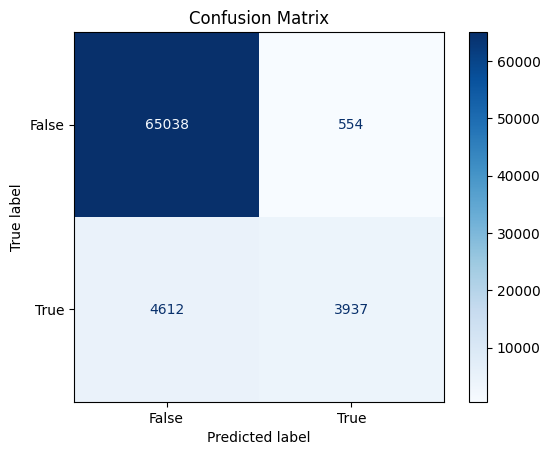

In [5]:
# Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9831402327996654


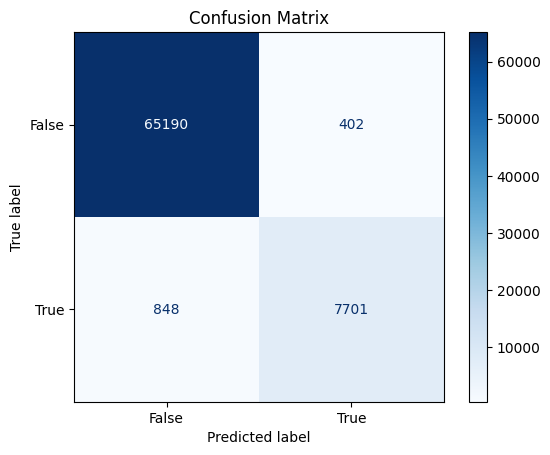

In [6]:
# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.966482782805735


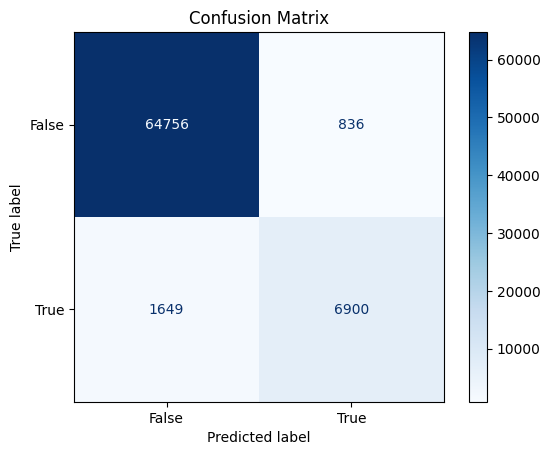

In [7]:
# Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.977974400129483


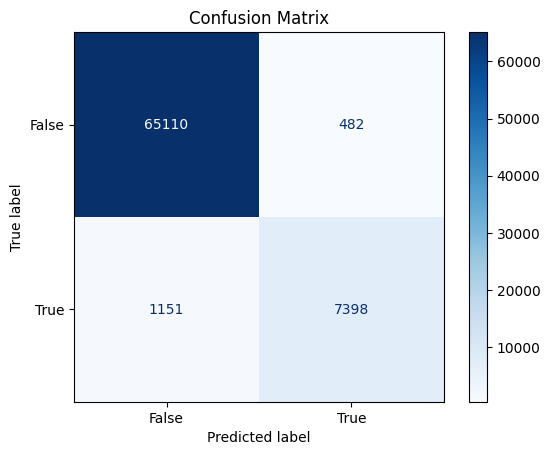

In [8]:
# Combine the result of the models, and use a voting classifier
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Tune the hyperparameters of the models on a smaller dataset
data = data[:5000]
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Best parameters: {'max_depth': 20, 'n_estimators': 50}
Best score: 0.9610000000000001
Accuracy: 0.958


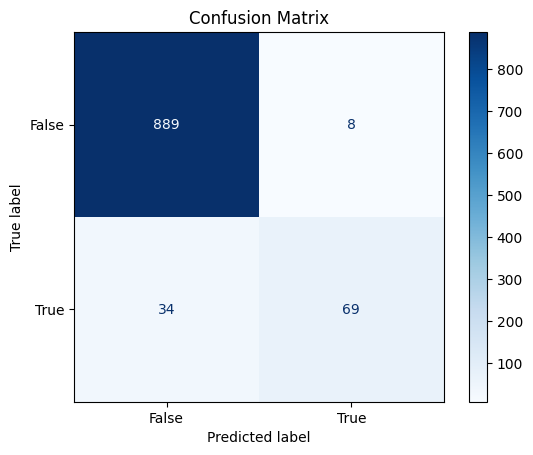

In [30]:
# Random Forest model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30]
}
model = RandomForestClassifier(random_state=42)
# Plot the accuracy of the model with different hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
model = grid_search.best_estimator_
# Predict
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best score: 0.9492499999999999
Accuracy: 0.955


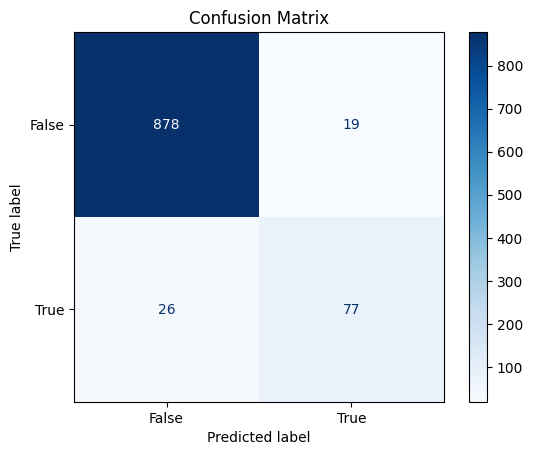

In [31]:
# Gradient Boosting model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30]
}
model = GradientBoostingClassifier(random_state=42)
# Plot the accuracy of the model with different hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
model = grid_search.best_estimator_

# Predict
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9848396973334592


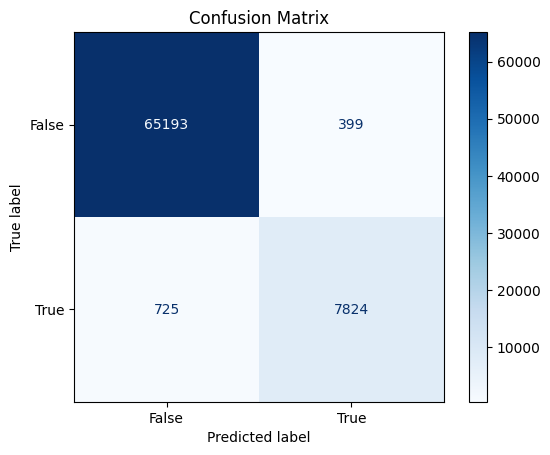

In [10]:
data = pd.read_csv('data/train_normalized.csv').drop(columns=['id'])
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the result of the models, and use a voting classifier
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(random_state=42, n_estimators=50, max_depth=20)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10))
], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Train combined model on the full data
model = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(random_state=42, n_estimators=50, max_depth=20)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10))
], voting='soft')
model.fit(X, y)

# Load the test data
test_data = pd.read_csv('data/test_normalized.csv')
print(test_data.head())

# Predict the test data
X_test = test_data.drop(columns=['id', 'is_fraud'])
y_pred = model.predict(X_test)

# Save the result
test_data['is_fraud'] = y_pred
result = test_data[['id', 'is_fraud']]
result.to_csv('data/submission.csv', index=False)


       id       amt  city_pop  trans_hour  day_of_week  trans_month  \
0   52329 -0.448747  3.894071    0.565217     0.833333     0.083333   
1   92215 -0.397471  0.209472    0.913043     0.333333     0.083333   
2  107070 -0.097929 -0.522276    1.000000     0.333333     0.083333   
3  117508  3.442625 -0.525998    0.608696     0.000000     0.083333   
4  525132  0.168025 -0.506584    0.956522     0.166667     0.083333   

   location_diff       age  category  merchant  job  gender  is_fraud  
0      -2.080644  1.483623         7       396  345       1        -1  
1      -1.272799  2.440915        13       292  385       1        -1  
2      -0.840216 -0.941515         6       213  197       1        -1  
3       1.530609  1.292165         4       563  276       0        -1  
4      -0.451520  0.398693        10       591    5       1        -1  
